# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

<b>Analysis based on Information Dated December 2020</b>
<br> What's the weather like as we approach the equator?
<li><b> Trend 1 </b>: Sample cities near the equator are likely to have higher maximum temperature (between 70 and 90 degrees). Sample cities between -20 and 20 latitudes are likely to have higher maximum temperatures than those that are not. Sample cities are more likely to have lower maximum temperature as (1) latitude decreases from -20 and (2) latitude increases from 20. </li>
<li><b> Trend 2 </b>: There seems to be little correlation between cloudiness and windspeed and distance from the equator (i.e., latitude) for the sample cities. Also note that sample cities' wind speed seem to be concentrated between 0 and 10 mph.</li>
<li><b> Trend 3 </b>: Sample cities near the equator are likely to have higher humidity (between 60 and 100%). Also note that sample cities between 40 and 80 latitude tend to have high humidity (between 70% and 100%).</li>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create DataFrame
cities_df = pd.DataFrame({"City": cities})

# Create columns in DataFrame
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

print("Beginning Data Retrieval")
print ("--------------------------------")
#set counters for printing status
counter = 1
max_counter = len(cities_df["City"])

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Loop through the cities_df and run a search for each city for the columns
for index, row in cities_df.iterrows():
    city = row['City']
    print(f"Processing Record {counter} of {max_counter} | {city}")
    counter = counter + 1
    try:
        current_weather = owm.get_current(city, **settings)
        cities_df.loc[index, "Cloudiness"] = current_weather['clouds']['all']
        cities_df.loc[index, "Country"] = current_weather['sys']['country']
        cities_df.loc[index, "Date"] = current_weather['dt']
        cities_df.loc[index, "Humidity"] = current_weather['main']['humidity']
        cities_df.loc[index, "Lat"] = current_weather['coord']['lat']
        cities_df.loc[index, "Lng"] = current_weather['coord']['lon']
        cities_df.loc[index, "Max Temp"] = current_weather['main']["temp_max"]
        cities_df.loc[index, "Wind Speed"] = current_weather['wind']["speed"]        
    except:
        print ("City not found. Skipping...")
    
    time.sleep(0.5)

Beginning Data Retrieval
--------------------------------
Processing Record 1 of 603 | taolanaro
City not found. Skipping...
Processing Record 2 of 603 | new norfolk
Processing Record 3 of 603 | busselton
Processing Record 4 of 603 | kruisfontein
Processing Record 5 of 603 | zhangye
Processing Record 6 of 603 | pimentel
Processing Record 7 of 603 | yellowknife
Processing Record 8 of 603 | ndioum
Processing Record 9 of 603 | kamenka
Processing Record 10 of 603 | vaini
Processing Record 11 of 603 | louisbourg
City not found. Skipping...
Processing Record 12 of 603 | atuona
Processing Record 13 of 603 | deputatskiy
Processing Record 14 of 603 | rikitea
Processing Record 15 of 603 | dingle
Processing Record 16 of 603 | dikson
Processing Record 17 of 603 | saint-philippe
Processing Record 18 of 603 | punta arenas
Processing Record 19 of 603 | qaanaaq
Processing Record 20 of 603 | port elizabeth
Processing Record 21 of 603 | king city
Processing Record 22 of 603 | saskylakh
Processing Record

Processing Record 188 of 603 | xuddur
Processing Record 189 of 603 | visby
Processing Record 190 of 603 | kieta
Processing Record 191 of 603 | buraydah
Processing Record 192 of 603 | yar-sale
Processing Record 193 of 603 | hambantota
Processing Record 194 of 603 | airai
Processing Record 195 of 603 | vanimo
Processing Record 196 of 603 | jumla
Processing Record 197 of 603 | victoria
Processing Record 198 of 603 | lebu
Processing Record 199 of 603 | tura
Processing Record 200 of 603 | havre-saint-pierre
Processing Record 201 of 603 | tessalit
Processing Record 202 of 603 | mogadishu
Processing Record 203 of 603 | sinnar
Processing Record 204 of 603 | inta
Processing Record 205 of 603 | talnakh
Processing Record 206 of 603 | hobyo
Processing Record 207 of 603 | iranshahr
Processing Record 208 of 603 | katsuura
Processing Record 209 of 603 | vaitupu
City not found. Skipping...
Processing Record 210 of 603 | abu kamal
Processing Record 211 of 603 | bauchi
Processing Record 212 of 603 | bei

Processing Record 385 of 603 | broken hill
Processing Record 386 of 603 | almeirim
Processing Record 387 of 603 | aksu
Processing Record 388 of 603 | sabha
Processing Record 389 of 603 | ponnani
Processing Record 390 of 603 | shingu
Processing Record 391 of 603 | amancio
City not found. Skipping...
Processing Record 392 of 603 | yuli
Processing Record 393 of 603 | morgan city
Processing Record 394 of 603 | ilulissat
Processing Record 395 of 603 | thinadhoo
Processing Record 396 of 603 | lompoc
Processing Record 397 of 603 | kaspiyskiy
Processing Record 398 of 603 | edd
Processing Record 399 of 603 | huarmey
Processing Record 400 of 603 | te anau
Processing Record 401 of 603 | grand gaube
Processing Record 402 of 603 | neiafu
Processing Record 403 of 603 | wencheng
Processing Record 404 of 603 | changji
Processing Record 405 of 603 | hihifo
City not found. Skipping...
Processing Record 406 of 603 | sile
Processing Record 407 of 603 | turkistan
City not found. Skipping...
Processing Reco

Processing Record 576 of 603 | mareeba
Processing Record 577 of 603 | bon air
Processing Record 578 of 603 | taoudenni
Processing Record 579 of 603 | la joya
Processing Record 580 of 603 | campina grande do sul
Processing Record 581 of 603 | san
Processing Record 582 of 603 | kongoussi
Processing Record 583 of 603 | belaya gora
Processing Record 584 of 603 | kissidougou
Processing Record 585 of 603 | exeter
Processing Record 586 of 603 | tuatapere
Processing Record 587 of 603 | nalvo
Processing Record 588 of 603 | boysun
Processing Record 589 of 603 | petrolina
Processing Record 590 of 603 | vanderhoof
Processing Record 591 of 603 | san luis
Processing Record 592 of 603 | saint-joseph
Processing Record 593 of 603 | vyshestebliyevskaya
Processing Record 594 of 603 | la ronge
Processing Record 595 of 603 | galesong
Processing Record 596 of 603 | bembereke
Processing Record 597 of 603 | oranjemund
Processing Record 598 of 603 | chernenko
Processing Record 599 of 603 | ponta delgada
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create a copy of the data frame
cities_df_clean = cities_df

# clean data frame
cities_df_clean.replace('', np.nan, inplace=True)
cities_df_clean = cities_df_clean.dropna(how='any', inplace=False)
cities_df_clean = cities_df_clean.reset_index(drop = True)
cities_df_clean.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [5]:
#save to CSV
cities_df_clean.to_csv(output_data_file)

#display data frame
cities_df_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,75.0,AU,1.576997e+09,52.0,-42.78,147.06,71.01,18.34
1,busselton,51.0,AU,1.576997e+09,54.0,-33.64,115.35,80.01,8.99
2,kruisfontein,1.0,ZA,1.576997e+09,57.0,-34.00,24.73,63.79,4.47
3,zhangye,30.0,CN,1.576997e+09,11.0,38.94,100.46,38.35,5.73
4,pimentel,93.0,BR,1.576997e+09,96.0,-3.70,-45.50,75.33,1.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

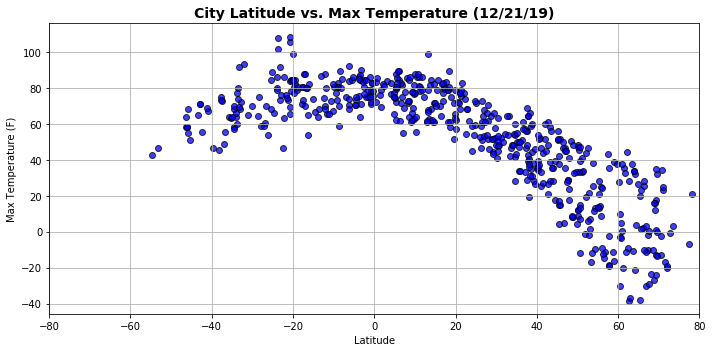

In [6]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Max Temp"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs. Max Temperature ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Max Temperature (F)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/MaxTemp_Lat.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

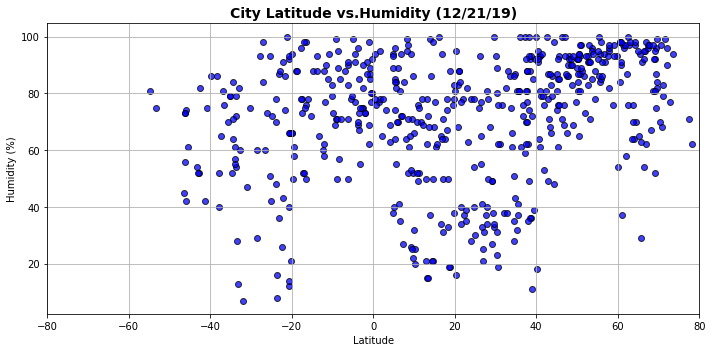

In [7]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Humidity"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs.Humidity ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Humidity (%)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/Humidity_Lat.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

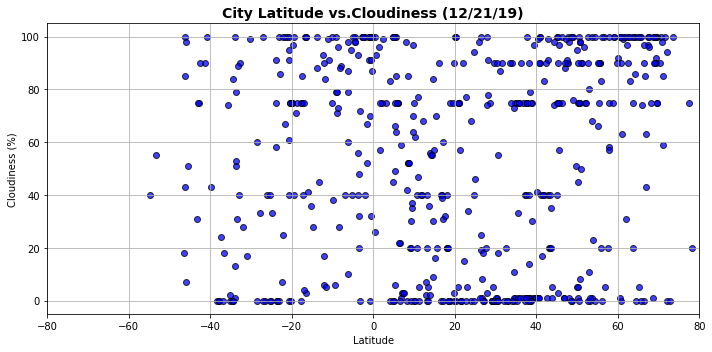

In [8]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Cloudiness"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs.Cloudiness ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Cloudiness (%)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/Cloudiness_Lat.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

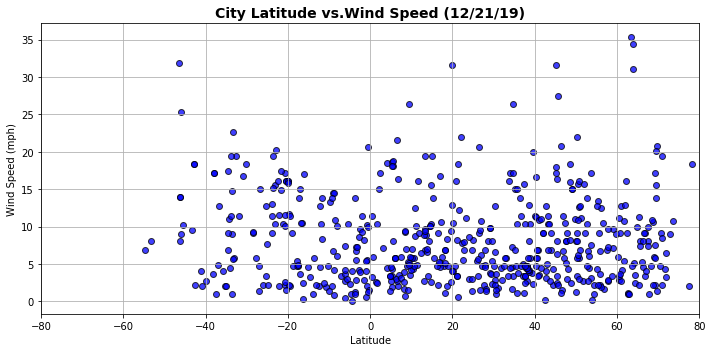

In [9]:
x_axis = cities_df_clean["Lat"]
y_axis = cities_df_clean["Wind Speed"]

plt.figure(figsize = [10,5])
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
date_code = cities_df_clean["Date"][0]
date = str(time.strftime("%D", time.localtime(int(date_code))))
title = f"City Latitude vs.Wind Speed ({date})"
plt.title(title, fontsize=14, fontweight="bold")
plt.grid(which = 'major', axis = "both")
plt.xlabel("Latitude")
plt.xlim(-80,80)
plt.ylabel("Wind Speed (mph)")

# Save the Figure
plt.tight_layout()
plt.savefig("output_data/WindSpeed_Lat.png")

# Show the Figure
plt.show()